<a href="https://colab.research.google.com/github/AnumoluAbhiram/MainFlow_internship_data_analysis/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/larger_student_grades.csv')


In [ ]:
# Step 2: Filtering Data Based on Conditions

# Filter students who scored more than 90 in Math
high_math_scores = df[df['Math'] > 90]

# Filter students who scored between 70 and 80 in Science
mid_science_scores = df[(df['Science'] >= 70) & (df['Science'] <= 80)]

print("High Math Scores:\n", high_math_scores)
print("\nMid Science Scores:\n", mid_science_scores)


High Math Scores:
          Student  Math  Science  English  History
0      Student_1    94       69       52       99
1      Student_2    97       96       55       59
19    Student_20    96       76       93       90
31    Student_32    97       95       78       62
36    Student_37    99       71       72       83
62    Student_63    91       94       64       57
63    Student_64    92       74       72       80
68    Student_69    91       53       72       71
72    Student_73    96       85       58       88
79    Student_80    92       90       61       77
85    Student_86    97       97       60       71
98    Student_99    98       59       51       82
99   Student_100    99       59       56       69
101  Student_102    91       73       98       64
108  Student_109    99       59       59       54
111  Student_112    98       95       56       67
115  Student_116    92       83       63       95
117  Student_118    98       84       66       86
123  Student_124    93       86

In [ ]:
# Step 3: Handling Missing Values

# Introduce some missing values for demonstration purposes
df.loc[0, 'Math'] = np.nan
df.loc[5, 'Science'] = np.nan

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handling missing values by filling them with the mean of the column
# For numeric columns only
df_filled = df.fillna(df.select_dtypes(include=['number']).mean())
print("\nData with Missing Values Handled:\n", df_filled)


Data with Missing Values Handled:
          Student       Math  Science  English  History
0      Student_1  72.865772     69.0       52       99
1      Student_2  97.000000     96.0       55       59
2      Student_3  50.000000     92.0       87       50
3      Student_4  53.000000     90.0       62       69
4      Student_5  53.000000     63.0       94       86
..           ...        ...      ...      ...      ...
145  Student_146  52.000000     83.0       79       80
146  Student_147  66.000000     68.0       83       56
147  Student_148  82.000000     67.0       72       95
148  Student_149  50.000000     79.0       57       80
149  Student_150  88.000000     70.0       91       65

[150 rows x 5 columns]


In [ ]:
# Step 4: Calculating Summary Statistics

# Calculate summary statistics
summary_stats = df.describe()

print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
              Math     Science     English     History
count  149.000000  149.000000  150.000000  150.000000
mean    72.865772   75.174497   73.853333   74.260000
std     15.049763   14.251473   13.723730   14.840734
min     50.000000   50.000000   50.000000   50.000000
25%     60.000000   63.000000   63.000000   60.000000
50%     72.000000   75.000000   73.000000   76.000000
75%     86.000000   88.000000   85.000000   86.000000
max     99.000000   99.000000   99.000000   99.000000


In [ ]:
# Additional Analysis

# Top Performers
# Calculate the average score for each student
df['Average'] = df[['Math', 'Science', 'English', 'History']].mean(axis=1)

# Identify the top 5 students
top_performers = df.nlargest(5, 'Average')

print("\nTop Performers:\n", top_performers)


Top Performers:
          Student  Math  Science  English  History  Average
58    Student_59  90.0     97.0       86       95    92.00
22    Student_23  87.0     94.0       91       93    91.25
19    Student_20  96.0     76.0       93       90    88.75
135  Student_136  77.0     90.0       94       88    87.25
9     Student_10  86.0     80.0       89       92    86.75


In [ ]:
# Subject Averages
# Calculate the average score for each subject
subject_averages = df[['Math', 'Science', 'English', 'History']].mean()

print("\nSubject Averages:\n", subject_averages)

# Correlation Analysis
# Compute the correlation matrix
correlation_matrix = df[['Math', 'Science', 'English', 'History']].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)



Subject Averages:
 Math       72.865772
Science    75.174497
English    73.853333
History    74.260000
dtype: float64

Correlation Matrix:
              Math   Science   English   History
Math     1.000000  0.043792 -0.129148  0.056336
Science  0.043792  1.000000 -0.002084 -0.036295
English -0.129148 -0.002084  1.000000  0.112457
History  0.056336 -0.036295  0.112457  1.000000


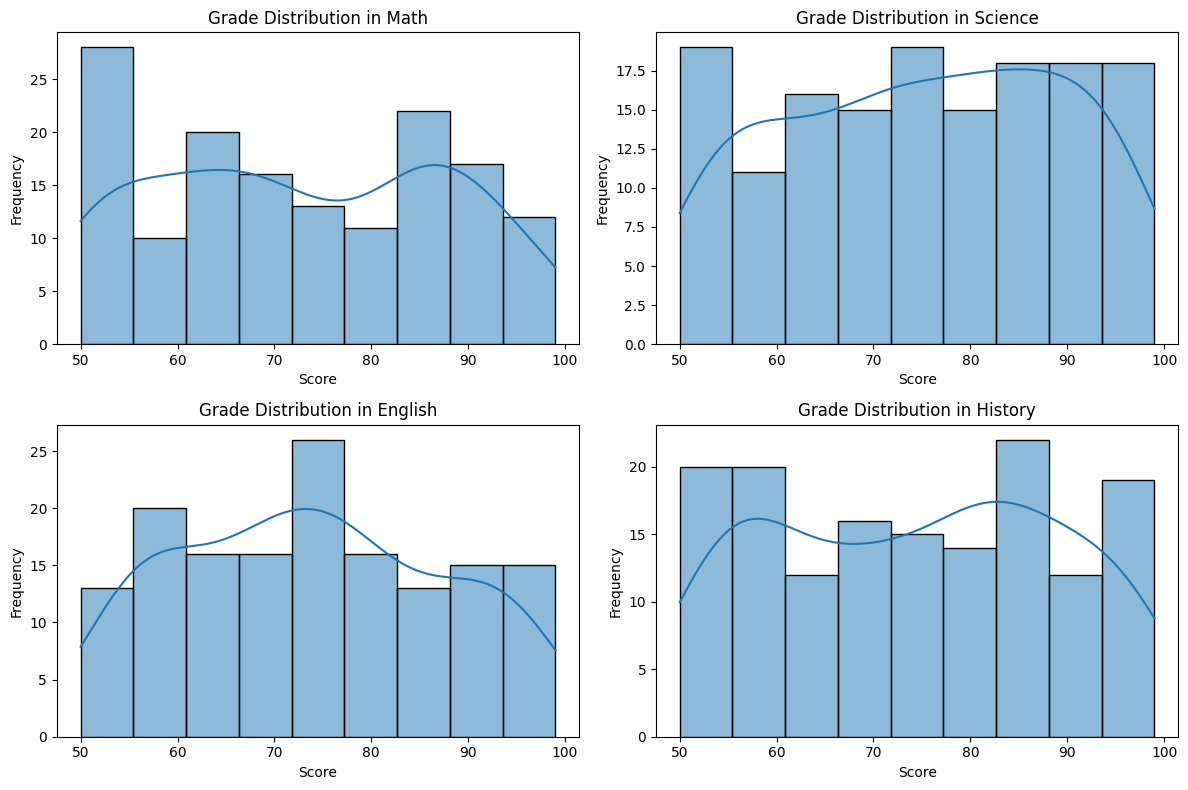

In [ ]:
# Grade Distribution
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot distribution for each subject
subjects = ['Math', 'Science', 'English', 'History']
for i, subject in enumerate(subjects):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[subject], kde=True)
    plt.title(f'Grade Distribution in {subject}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()